In [1]:
#first load data and clean data

In [44]:
% matplotlib inline
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

In [45]:
idf = pd.read_csv('/Users/cguy/Downloads/Iowa_Liquor_Sales_reduced.csv')

In [46]:
#Remove spaces and parentheses from column names

idf.columns.str.strip()
idf.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
idf.rename(columns=lambda x: x.replace('(', ''), inplace=True)
idf.rename(columns=lambda x: x.replace(')', ''), inplace=True)

In [47]:
# Remove "$" prices from characters and convert values to floats.

idf[['State_Bottle_Cost', 'State_Bottle_Retail', 'Sale_Dollars']] = \
                            idf[['State_Bottle_Cost', 'State_Bottle_Retail', 'Sale_Dollars']]\
                                                    .apply(lambda x: x.str.replace('$', ""))
idf[['State_Bottle_Cost', 'State_Bottle_Retail', 'Sale_Dollars']] = \
                            idf[['State_Bottle_Cost', 'State_Bottle_Retail', 'Sale_Dollars']]\
                                                    .apply(lambda x: pd.to_numeric(x))

In [48]:
# Need to change date to datetime

idf['Date'] = idf['Date'].str.replace('/', "-")
idf["Date"] = pd.to_datetime(idf["Date"], format= "%m-%d-%Y")

In [49]:
#-need to change zipcode to int

idf["Zip_Code"] = pd.to_numeric(idf["Zip_Code"], errors='coerce')

# I want zip_code values to be dtype 'int', not 'float'. 
# I am going to use 00000 for zipcodes that were missing or mistyped, 
# that way they can still be included in the data analysis, but distinguished if need be...
idf['Zip_Code'] = idf['Zip_Code'].fillna('00000').astype(int)


In [50]:
# Drop or replace bad values
print idf.isnull().sum()

#Will fill other missing values with NA for now....
idf.fillna(np.nan)
idf.isnull().sum()

Date                       0
Store_Number               0
City                       0
Zip_Code                   0
County_Number          10913
County                 10913
Category                 779
Category_Name           6109
Vendor_Number              0
Item_Number                0
Item_Description           0
Bottle_Volume_ml           0
State_Bottle_Cost          0
State_Bottle_Retail        0
Bottles_Sold               0
Sale_Dollars               0
Volume_Sold_Liters         0
Volume_Sold_Gallons        0
dtype: int64


Date                       0
Store_Number               0
City                       0
Zip_Code                   0
County_Number          10913
County                 10913
Category                 779
Category_Name           6109
Vendor_Number              0
Item_Number                0
Item_Description           0
Bottle_Volume_ml           0
State_Bottle_Cost          0
State_Bottle_Retail        0
Bottles_Sold               0
Sale_Dollars               0
Volume_Sold_Liters         0
Volume_Sold_Gallons        0
dtype: int64

In [51]:
###Data Cleaned:

#did NOT drop NAs
#did NOT remove those who closed in 2015


In [52]:
###Computing other vars:

# Margin and Price per liter

#margin, retail cost minus bottle cost
idf['Margin'] = idf['State_Bottle_Retail'] - idf['State_Bottle_Cost']

# price per bottle
#already a column in the dataset ==> State_Bottle_Retail

# price per liter
idf['Price_Per_L'] = (idf['Bottle_Volume_ml']/1000) * idf['State_Bottle_Retail']


In [53]:
### Now I will divide my datasets:

## All sales, all variables, 2015 - 2016
idf

## All sales 2015
idf_2015 = idf[(idf['Date'].dt.year == 2015)]

## All sales 2015_Q1
yr15_Q1_end = datetime.date(2015, 3, 31)
idf_2015_Q1 = idf[(idf['Date'].dt.date <= yr15_Q1_end)]

## All sales 2016_Q1
idf_2016_Q1 = idf[(idf['Date'].dt.year == 2016)]


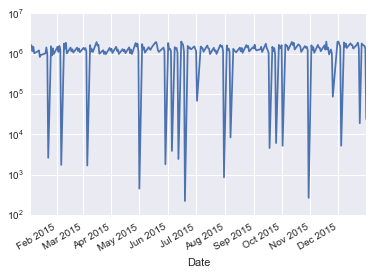

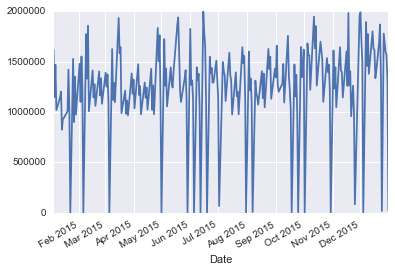

In [54]:
##Time Series Plots

#WITH OUTLIERS
#Looking at total sales amount per date from all stores for 2015
total_2015_sales = idf_2015.groupby('Date')['Sale_Dollars'].agg(np.sum)
total_2015_sales = total_2015_sales.reset_index()

#test = total_2015_sales_all[(total_2015_sales_all!=0)&(pd.isnull(total_2015_sales_all))]

plt.figure()
total_2015_sales.plot(x='Date', y='Sale_Dollars',label='total_2015_sales', logy=True, legend=False)
total_2015_sales.plot(x='Date', y='Sale_Dollars',label='total_2015_sales', legend=False)


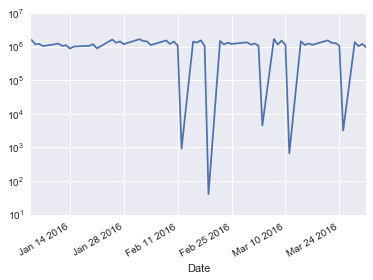

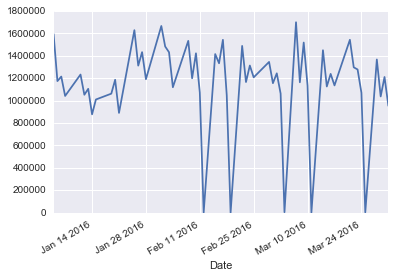

In [55]:
#Looking at total sales amount per date from all stores for 2016
total_2016_sales = idf_2016_Q1.groupby('Date')['Sale_Dollars'].agg(np.sum)
total_2016_sales = total_2016_sales.reset_index()

plt.figure()
total_2016_sales.plot(x='Date', y='Sale_Dollars',label='total_2016_sales_all', logy=True, legend=False)
total_2016_sales.plot(x='Date', y='Sale_Dollars',label='total_2016_sales_all', legend=False)


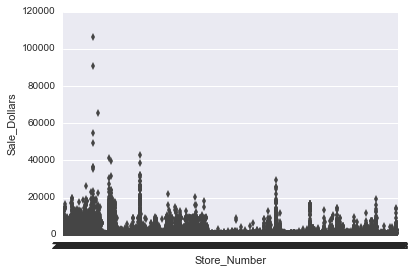

In [56]:
#with outliers

#Looking at Boxplots of total sales for each store for 2015 and 2016

sns.boxplot(x="Store_Number", y="Sale_Dollars", data=idf)


In [57]:
#scatter_matrix(idf_2016_Q1, alpha=0.2, figsize=(10, 10))

In [58]:
#scatter_matrix(idf_2015_Q1, alpha=0.2, figsize=(10, 10))

In [59]:
#scatter_matrix(idf, alpha=0.2, figsize=(10, 10))

In [60]:
#Now for pivots:
#idf_2015
#SALES, Bottles Sold, Volume Sold, Margin BY:
   
    #Store
store_2015 = pd.pivot_table(idf_2015, index = "Store_Number", values=["Bottles_Sold","Volume_Sold_Liters",'Sale_Dollars','Margin'], aggfunc=[np.sum,np.mean,np.median])
store_2015 = store_2015.reset_index()
   
    #County
county_2015 = pd.pivot_table(idf_2015, index = "County", values=["Bottles_Sold","Volume_Sold_Liters",'Sale_Dollars','Margin'], aggfunc=[np.sum,np.mean,np.median])
county_2015 = county_2015.reset_index()

    #Zipcode
zipcode_2015 = pd.pivot_table(idf_2015, index = "Zip_Code", values=["Bottles_Sold","Volume_Sold_Liters",'Sale_Dollars','Margin'], aggfunc=[np.sum,np.mean,np.median])
zipcode_2015 = zipcode_2015.reset_index()
    
    #City
city_2015 = pd.pivot_table(idf_2015, index = "City", values=["Bottles_Sold","Volume_Sold_Liters",'Sale_Dollars','Margin'], aggfunc=[np.sum,np.mean,np.median])
city_2015 = city_2015.reset_index()  
    
    #Category Name
category_2015 = pd.pivot_table(idf_2015, index = "Category_Name", values=["Bottles_Sold","Volume_Sold_Liters",'Sale_Dollars','Margin'], aggfunc=[np.sum,np.mean,np.median])
category_2015 = category_2015.reset_index()    
    
    #item desc
brand_2015 = pd.pivot_table(idf_2015, index = "Item_Description", values=["Bottles_Sold","Volume_Sold_Liters",'Sale_Dollars','Margin'], aggfunc=[np.sum,np.mean,np.median])
brand_2015 = brand_2015.reset_index() 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12bcf8dd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x16c7b9b90>]], dtype=object)

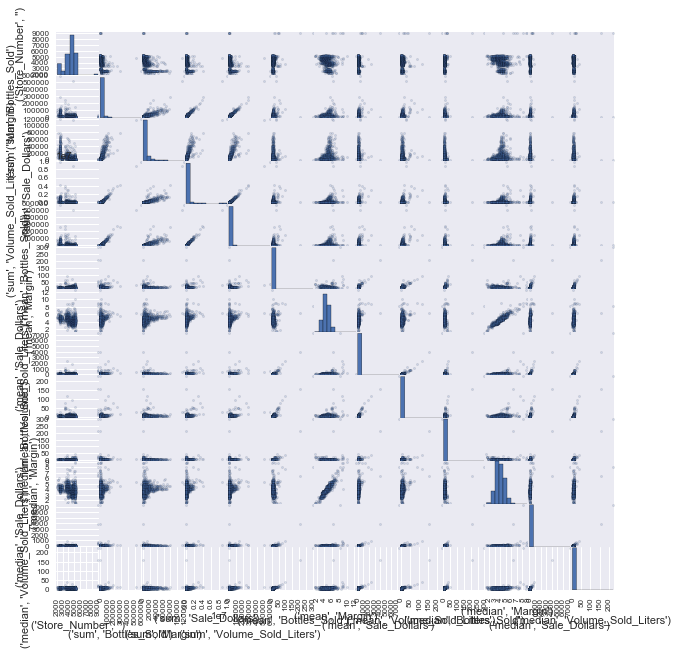

In [30]:
scatter_matrix(store_2015, alpha=0.2, figsize=(10, 10))

In [31]:
store_2015_avg = pd.pivot_table(idf_2015, index = "Store_Number", values=["Bottles_Sold","Volume_Sold_Liters",'Sale_Dollars','Margin'])
store_2015_avg = store_2015_avg.reset_index()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x16c8990d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x165d69fd0>]], dtype=object)

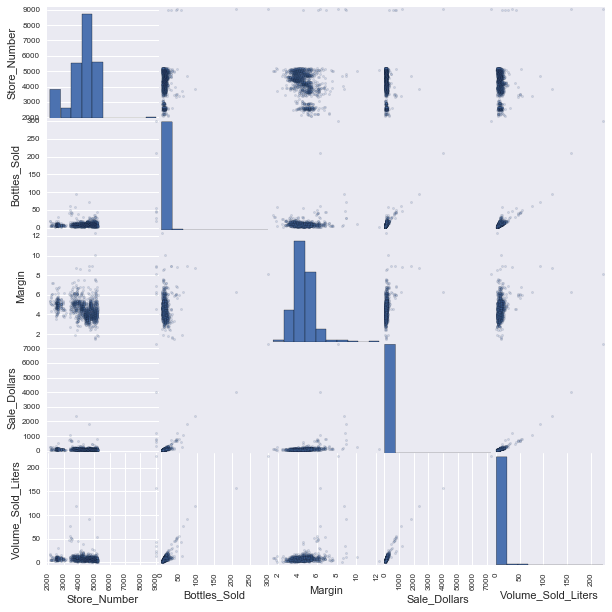

In [32]:
scatter_matrix(store_2015_avg, alpha=0.2, figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x166742710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x17b29cd50>]], dtype=object)

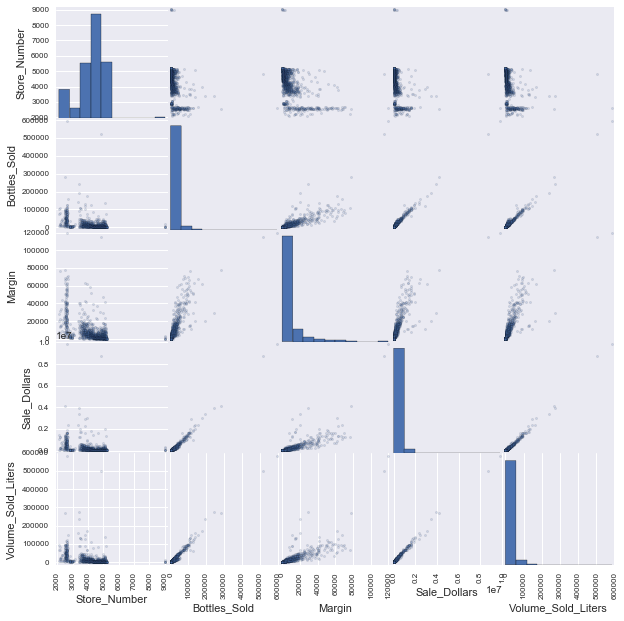

In [33]:
store_2015_sum = pd.pivot_table(idf_2015, index = "Store_Number", values=["Bottles_Sold","Volume_Sold_Liters",'Sale_Dollars','Margin'], aggfunc=np.sum)
store_2015_sum = store_2015_sum.reset_index()
scatter_matrix(store_2015_sum, alpha=0.2, figsize=(10, 10))

In [65]:
#AVG
#Now for pivots:
#idf_2015
#SALES, Bottles Sold, Volume Sold, Margin BY:
   
    #Store
store_2015_avg = pd.pivot_table(idf_2015, index = "Store_Number", values=["Bottles_Sold","Volume_Sold_Liters",'Sale_Dollars','Margin'])
store_2015_avg = store_2015_avg.reset_index()
   
    #County
county_2015_avg = pd.pivot_table(idf_2015, index = "County_Number", values=["Bottles_Sold","Volume_Sold_Liters",'Sale_Dollars','Margin'])
county_2015_avg = county_2015_avg.reset_index()

    #Zipcode
zipcode_2015_avg = pd.pivot_table(idf_2015, index = "Zip_Code", values=["Bottles_Sold","Volume_Sold_Liters",'Sale_Dollars','Margin'])
zipcode_2015_avg = zipcode_2015_avg.reset_index()
    
    #City
city_2015_avg = pd.pivot_table(idf_2015, index = "City", values=["Bottles_Sold","Volume_Sold_Liters",'Sale_Dollars','Margin'])
city_2015_avg = city_2015_avg.reset_index()  
    
    #Category Name
category_2015_avg = pd.pivot_table(idf_2015, index = "Category_Name", values=["Bottles_Sold","Volume_Sold_Liters",'Sale_Dollars','Margin'])
category_2015_avg = category_2015_avg.reset_index()    
    
    #item desc
brand_2015_avg = pd.pivot_table(idf_2015, index = "Item_Description", values=["Bottles_Sold","Volume_Sold_Liters",'Sale_Dollars','Margin'])
brand_2015_avg = brand_2015_avg.reset_index() 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x17b490350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x183140690>]], dtype=object)

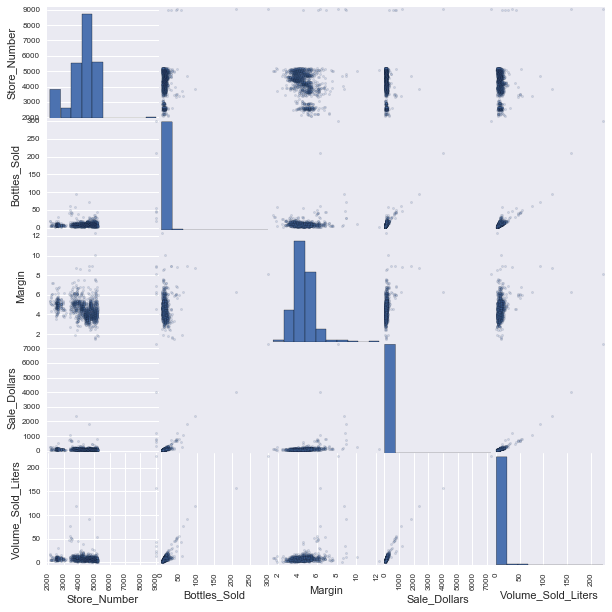

In [35]:
scatter_matrix(store_2015_avg, alpha=0.2, figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x165e75c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a0778b90>]], dtype=object)

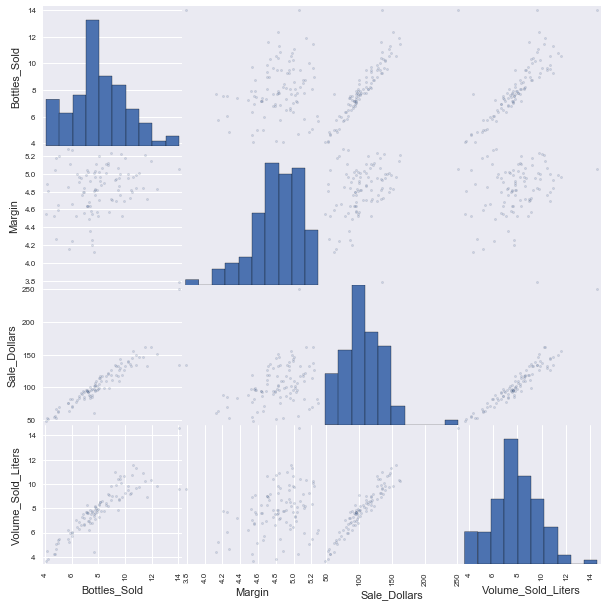

In [36]:
scatter_matrix(county_2015_avg, alpha=0.2, figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x19eeaaf90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1770e8e10>]], dtype=object)

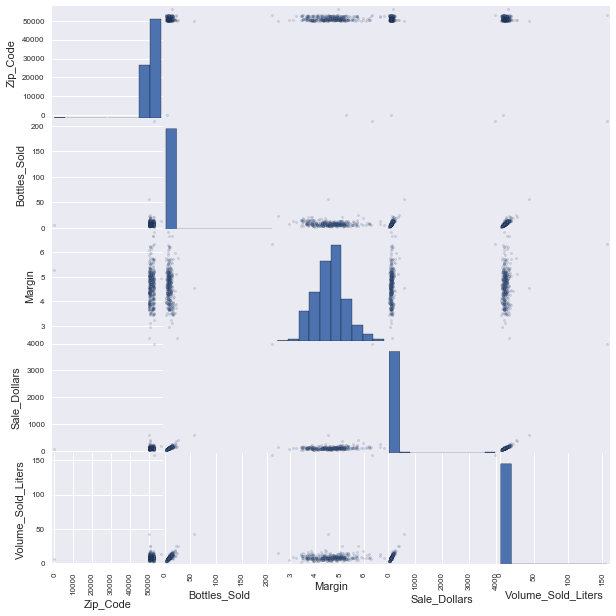

In [37]:
scatter_matrix(zipcode_2015_avg, alpha=0.2, figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a02b6410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1527545d0>]], dtype=object)

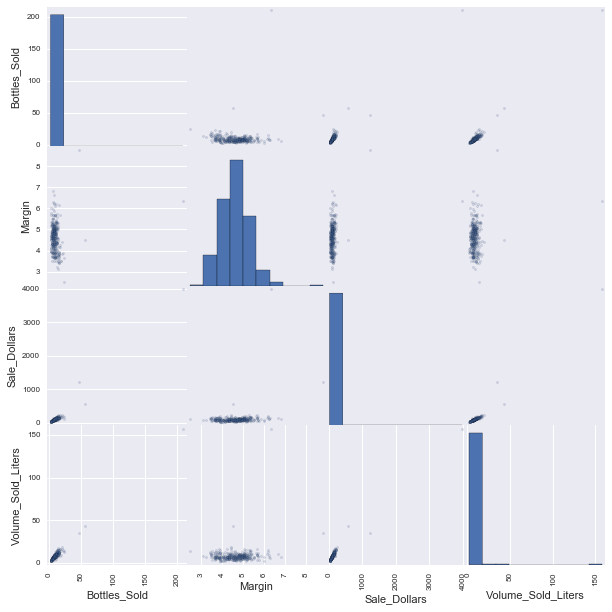

In [38]:
scatter_matrix(city_2015_avg, alpha=0.2, figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x152c40190>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x178715ad0>]], dtype=object)

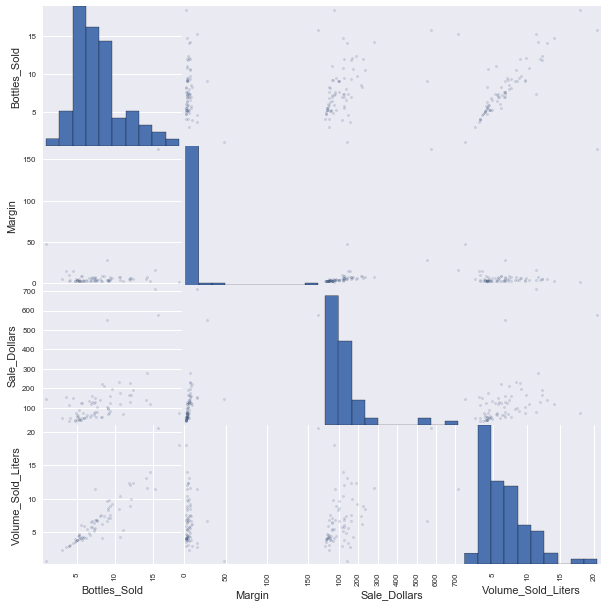

In [39]:
scatter_matrix(category_2015_avg, alpha=0.2, figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x152b96050>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1d93c10>]], dtype=object)

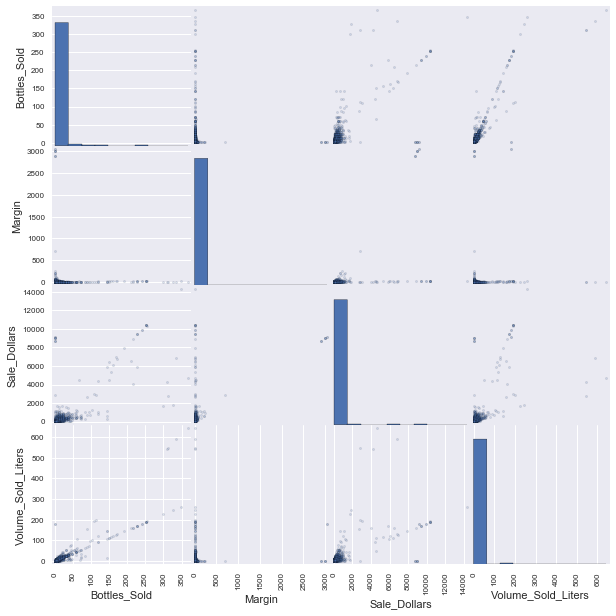

In [40]:
scatter_matrix(brand_2015_avg, alpha=0.2, figsize=(10, 10))

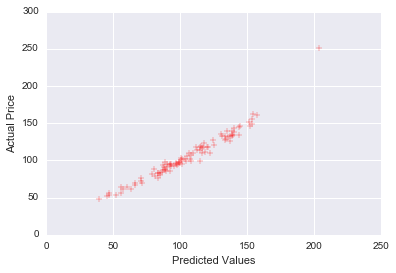

MSE: 45.3851056438


In [66]:
#based on scatterplot matrices, I will make a model for counties.

from sklearn import linear_model
lm = linear_model.LinearRegression()
from sklearn.metrics import mean_squared_error

X = county_2015_avg[["County_Number", "Bottles_Sold", "Volume_Sold_Liters", "Margin"]]
y = county_2015_avg["Sale_Dollars"]

model = lm.fit(X, y)
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Price")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

In [70]:
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

lr_r2 =  r2_score(y_true=y, y_pred=model.predict(X))
lr_r2

0.95200503054590924

In [71]:
print len(model.coef_)
model.coef_

4


array([  7.82919092e-03,   7.47981832e+00,   7.42116195e+00,
         1.77034562e+01])

In [72]:
print abs(model.coef_).mean()
print model.coef_.max()


8.15306642116
17.7034562253


In [75]:
cvp_model_preds = cross_val_predict(model, X, y, cv=4)
cvp_model_preds.shape


(99,)

In [77]:
from sklearn.cross_validation import train_test_split


dy = county_2015_avg['Sale_Dollars']

X_train, X_test, y_train, y_test = \
train_test_split(county_2015_avg, dy, test_size=0.6)

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

       X Shape  Y Shape
Train (39, 5) (39,)
Test  (60, 5) (60,)


Score: 1.0


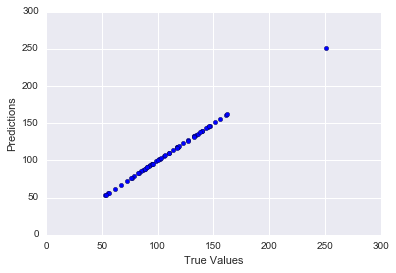

In [79]:
model2 = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model2.score(X_test, y_test) 

Cross-validated scores: [ 1.  1.  1.  1.]
Cross-Predicted R^2: 1.0


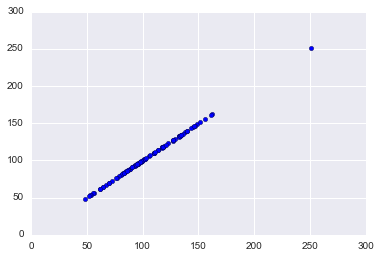

In [80]:
# Perform 6-fold cross validation
scores = cross_val_score(model2, county_2015_avg, dy, cv=4)
print "Cross-validated scores:", scores

# Make cross validated predictions
predictions = cross_val_predict(model, county_2015_avg, dy, cv=4)
plt.scatter(dy, predictions)
r2_s = r2_score(dy, predictions)
print "Cross-Predicted R^2:", r2_s